# Linda Li
## ANLY-590-02 HW0

# 1. Regularization

Using the Hitters dataset, we will explore regression models to predict a player's salary from other variables.

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize
from sklearn.linear_model import lasso_path
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

Let's first get our dataset ready for the model training.

In [2]:
# read in dataset as dataframe
df = pd.read_csv('hitters.csv')

# remove records with missing values
df = df.dropna()

# print info about data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 21 columns):
Unnamed: 0    263 non-null object
AtBat         263 non-null int64
Hits          263 non-null int64
HmRun         263 non-null int64
Runs          263 non-null int64
RBI           263 non-null int64
Walks         263 non-null int64
Years         263 non-null int64
CAtBat        263 non-null int64
CHits         263 non-null int64
CHmRun        263 non-null int64
CRuns         263 non-null int64
CRBI          263 non-null int64
CWalks        263 non-null int64
League        263 non-null object
Division      263 non-null object
PutOuts       263 non-null int64
Assists       263 non-null int64
Errors        263 non-null int64
Salary        263 non-null float64
NewLeague     263 non-null object
dtypes: float64(1), int64(16), object(4)
memory usage: 45.2+ KB


In [3]:
# get numeric predictor names (omitting categorical predictors)
numeric_pred = df.select_dtypes(include=['int64']).columns

# build design matrix
X = df[numeric_pred].astype(float)

# normalize by feature
X = normalize(X.values, axis=0)

# extract prediction variable
y = df['Salary']

# print predictors
numeric_pred

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors'],
      dtype='object')

## 1.1

We will now use LASSO regression to predict Salary from the other numeric predictors. Below is a visualization of the coefficient trajectories.

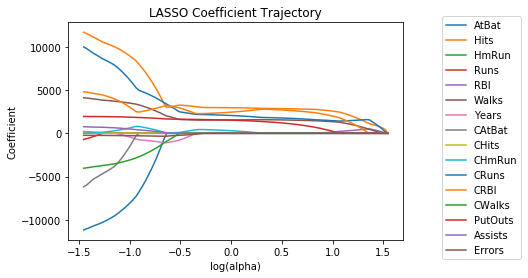

In [4]:
# compute LASSO path
alphas, coef_path, _ = lasso_path(X, y)

# plot coefficient trajectories
for i in range(len(coef_path)):
    plt.plot(np.log10(alphas), coef_path[i])
plt.legend(numeric_pred, bbox_to_anchor=(1.1, 1.05))
plt.xlabel('log(alpha)')
plt.ylabel('Coefficient')
plt.title('LASSO Coefficient Trajectory')
plt.show()

Let's look at some of the coefficient values.

In [5]:
# build and display dataframe of coefficient values for each penalty value
coef_df = pd.DataFrame(columns = alphas, data = coef_path, index = numeric_pred)
coef_df

,35.1876725591,32.8161411977,30.6044431127,28.5418060764,26.618183873,24.8242073679,23.151138875,21.590829599,20.135679946,18.7786025094,...,0.0659352739112,0.0614914571272,0.0573471387216,0.0534821335059,0.0498776167061,0.0465160322747,0.0433810073831,0.0404572726766,0.037730587904,0.0351876725591
AtBat,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-9762.743455,-9962.551907,-10148.990406,-10319.941025,-10465.796909,-10604.122720,-10740.493602,-10894.864963,-11035.695789,-11170.311849
Hits,0.0,445.843156,659.163084,791.034731,904.778119,1011.042057,1110.197349,1267.310377,1441.106584,1603.107690,...,10161.630379,10304.246859,10437.312716,10569.817971,10778.383458,10974.617997,11160.857003,11347.066164,11518.403641,11683.136226
HmRun,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Runs,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.000000,-0.000000,-0.000000,-13.527466,-153.063354,-283.197315,-402.836890,-512.977000,-615.491004,-712.339696
RBI,0.0,29.302828,163.559353,262.167329,349.789822,431.342193,507.383646,497.725556,457.324352,419.723222,...,31.550537,43.012079,53.709069,64.809321,89.231096,112.170494,133.456530,154.263866,173.402425,189.188965
Walks,0.0,0.000000,0.000000,113.441147,235.645699,349.584928,455.812680,565.591037,670.766689,768.853694,...,3748.758348,3781.313335,3811.691316,3842.235764,3894.203647,3942.927786,3988.192946,4031.336682,4071.156290,4109.484478
Years,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,15.445775,90.087758,159.146886,218.953545
CAtBat,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-4066.903755,-4289.219743,-4496.449706,-4694.360117,-4918.097427,-5126.336211,-5343.475484,-5664.744635,-5963.118068,-6195.948676
CHits,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CHmRun,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,241.539350,196.754612,155.042596,117.226619,94.169253,72.824063,52.582932,25.909666,0.961039,0.000000


The final three predictors to remain in this model are **Hits**, **RBI**, and **CRuns**. 

Now, let's find the amount of penalization chosen by 10-fold cross-validation.

In [6]:
# build and fit CV model
lasso_cv = LassoCV(cv=10).fit(X,y)

# print optimal penalization
lasso_cv.alpha_

0.04821309956833527

The optimal value of the regularization penalty is about 0.0482.

Below, are the coefficient values for this model.

In [7]:
# print optimal coefficient values
list(zip(numeric_pred, lasso_cv.coef_))

[('AtBat', -12655.006662550657),
 ('Hits', 11529.893406815841),
 ('HmRun', 0.0),
 ('Runs', -15.796706320121329),
 ('RBI', 256.852240371211),
 ('Walks', 3865.3350880691742),
 ('Years', -797.91240302654364),
 ('CAtBat', -4896.1264759419728),
 ('CHits', 0.0),
 ('CHmRun', 79.473673901394548),
 ('CRuns', 9304.1284828602675),
 ('CRBI', 4766.9097799930159),
 ('CWalks', -3967.9371649781656),
 ('PutOuts', 1914.1465109959415),
 ('Assists', 890.49580079303723),
 ('Errors', -451.95576892816035)]

In this model, 14 predictors remain.

## 1.2

Next, we will use Ridge Regression. Let's again visualize the coefficient trajectories.

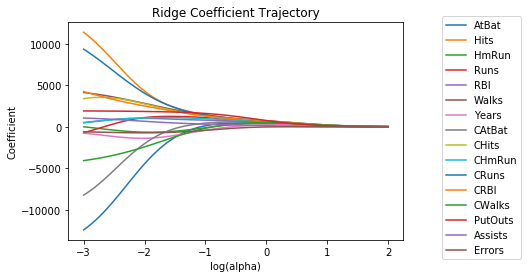

In [8]:
# generate penalty values
alphas = 10**(np.linspace(-3,2,100))
coefs = []

# build Ridge regression model for each penalty value
for a in alphas:
    ridge_mod = Ridge(alpha=a, max_iter=3000, random_state=1).fit(X, y)
    coefs.append(ridge_mod.coef_)
coefs = np.transpose(np.matrix(coefs))

# plot coefficent trajectories
for i in range(len(coefs)):
    plt.plot(np.log10(alphas), np.asarray(coefs[i])[0])
plt.legend(numeric_pred, bbox_to_anchor=(1.1, 1.05))
plt.xlabel('log(alpha)')
plt.ylabel('Coefficient')
plt.title('Ridge Coefficient Trajectory')
plt.show()

Let's look at some of the coefficient values.

In [9]:
# build and display dataframe of coefficient values for each penalty value
coef_df = pd.DataFrame(columns = alphas, data = coefs, index = numeric_pred)
coef_df

,0.001,0.00112332403298,0.00126185688307,0.00141747416293,0.00159228279334,0.00178864952906,0.00200923300257,0.00225701971963,0.00253536449397,0.00284803586844,...,35.1119173422,39.4420605944,44.3062145758,49.7702356433,55.9081018251,62.8029144183,70.5480231072,79.2482898354,89.0215085445,100.0
AtBat,-12402.493416,-12128.664768,-11835.447896,-11522.625139,-11190.226953,-10838.567805,-10468.275743,-10080.312852,-9675.984161,-9256.933139,...,26.674718,23.877524,21.361538,19.100878,17.071573,15.251516,13.620402,12.159639,10.852262,9.682827
Hits,11378.839634,11086.492575,10777.759732,10453.122936,10113.355266,9759.544043,9393.103623,9015.775296,8629.612221,8236.948228,...,33.589064,30.046508,26.864284,24.008344,21.447352,19.152564,17.097700,15.258797,13.614063,12.143723
HmRun,2.334523,-35.807844,-75.200491,-115.632931,-156.855511,-198.580599,-240.485462,-282.216916,-323.397730,-363.634603,...,40.002606,35.874712,32.148326,28.789239,25.765180,23.045923,20.603324,18.411317,16.445868,14.684909
Runs,-699.514810,-599.415093,-495.930488,-389.546100,-280.844411,-170.503687,-59.291698,51.945787,162.301953,270.831117,...,35.113871,31.419604,28.099245,25.117845,22.443157,20.045538,17.897831,15.975235,14.255158,12.717077
RBI,520.629683,558.939691,597.981024,637.450948,677.006730,716.270194,754.834578,792.273689,828.153204,862.043732,...,39.515191,35.397491,31.688598,28.351911,25.353320,22.661199,20.246356,18.081952,16.143402,14.408254
Walks,4129.592435,4085.684429,4038.969783,3989.416970,3937.020112,3881.801525,3823.813299,3763.137667,3699.886003,3634.196408,...,40.758879,36.494245,32.656625,29.207011,26.109230,23.329882,20.838245,18.606166,16.607918,14.820064
Years,-756.427044,-793.750907,-832.921473,-873.702949,-915.800412,-958.860104,-1002.471626,-1046.172122,-1089.452455,-1131.765268,...,41.240617,37.109423,33.355015,29.950430,26.869092,24.085192,21.573972,19.311912,17.276864,15.448114
CAtBat,-8217.364867,-7980.269894,-7724.935914,-7452.083942,-7162.767865,-6858.367151,-6540.568011,-6211.333293,-5872.861963,-5527.539632,...,65.311971,58.683143,52.677025,47.245018,42.340311,37.918272,33.936716,30.356062,27.139412,24.252551
CHits,3388.875315,3440.089556,3481.748975,3513.384868,3534.689108,3545.517987,3545.891104,3535.985456,3516.124962,3486.765879,...,70.063180,62.924824,56.462754,50.622937,45.353646,40.605804,36.333211,32.492666,29.044010,25.950098
CHmRun,473.312825,518.655561,563.394798,607.249030,649.948250,691.240811,730.900121,768.730729,804.573303,838.308059,...,76.681518,68.874937,61.806597,55.417834,49.652401,44.456868,39.780892,35.577358,31.802441,28.415584


Unlike LASSO, Ridge does not do feature selection. So, all the predictors will have nonzero coefficients for any regularization penalty value. However, the magnitudes can become very small.

Now, let's find the amount of penalization chosen by 10fold cross-validation.

In [10]:
# build and fit CV model
ridge_cv = RidgeCV(cv=10).fit(X,y)

# print optimal penalization
print(ridge_cv.alpha_)

0.1


The optimal value of the regularization penalty is about 0.1.

Below, are the coefficient values for this model.

In [11]:
# print optimal coefficent values
list(zip(numeric_pred, ridge_cv.coef_))

[('AtBat', 131.45665491189288),
 ('Hits', 1460.2187329629271),
 ('HmRun', -108.9424185821775),
 ('Runs', 1113.1649768536306),
 ('RBI', 802.27068654031461),
 ('Walks', 1427.5607824405495),
 ('Years', -405.93254745202296),
 ('CAtBat', 445.45026973584311),
 ('CHits', 1288.6202318718015),
 ('CHmRun', 975.35497326822133),
 ('CRuns', 1407.2144062921934),
 ('CRBI', 1306.8211672800944),
 ('CWalks', -179.08498203909278),
 ('PutOuts', 1610.1658042769741),
 ('Assists', 327.8702420941147),
 ('Errors', -424.47591936415796)]

All of the predictors remain in this model. Predictors like **HmRun** and **CWalk** seem to have much smaller coefficient magnitudes and are less likely to influence the Salary predictions.

# 2. Short Answer

The **bias-variance tradeoff** refers to a problem with building predictive models. Models with low bias will have high variance and models with low variance will have high bias. 

Models with low bias will fit the training data very well, but are more likely to perform poorly on previously unseen data. These models tend to overfit training data. On the other hand, if a model has low variance, it will perform similarly on both seen and previously unseen data. However, it is unlikely to fit the training data with high accuracy.

Regularization is used to prevent building models with low bias and high variance. In particular, with LASSO and Ridge, we can prevent overfitting by trying to eliminate or minimize the impact of less important predictors. Without regularization, our models could have low bias and include all the predictors. Therefore, these models will have high variance and will not perform well on new data.

In part 1, models with a very small penalty value will resemble regression without regularization and include all the predictors. These models are more likely to have low bias but high variance. However, LASSO and Ridge models with sufficiently large penalty values are less likely to have low bias since the impact of some predictors are removed or minimized.